# Comparison between Local Z Projector and Dottamine Projector

## Heightmaps comparison

In [67]:
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff

The LocalZProjector heightmaps are done using 1 to all the parameters of binning 

In [77]:
def normalize_image(im, mult_factor = 1):
    '''
    Normalize image (any Dimensions) function.
    '''
    im = np.array(im)
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im

def reverse_values(im):
    rev_im = im.max()-im
    return rev_im



(485, 485)
(485, 485)
(485, 485)


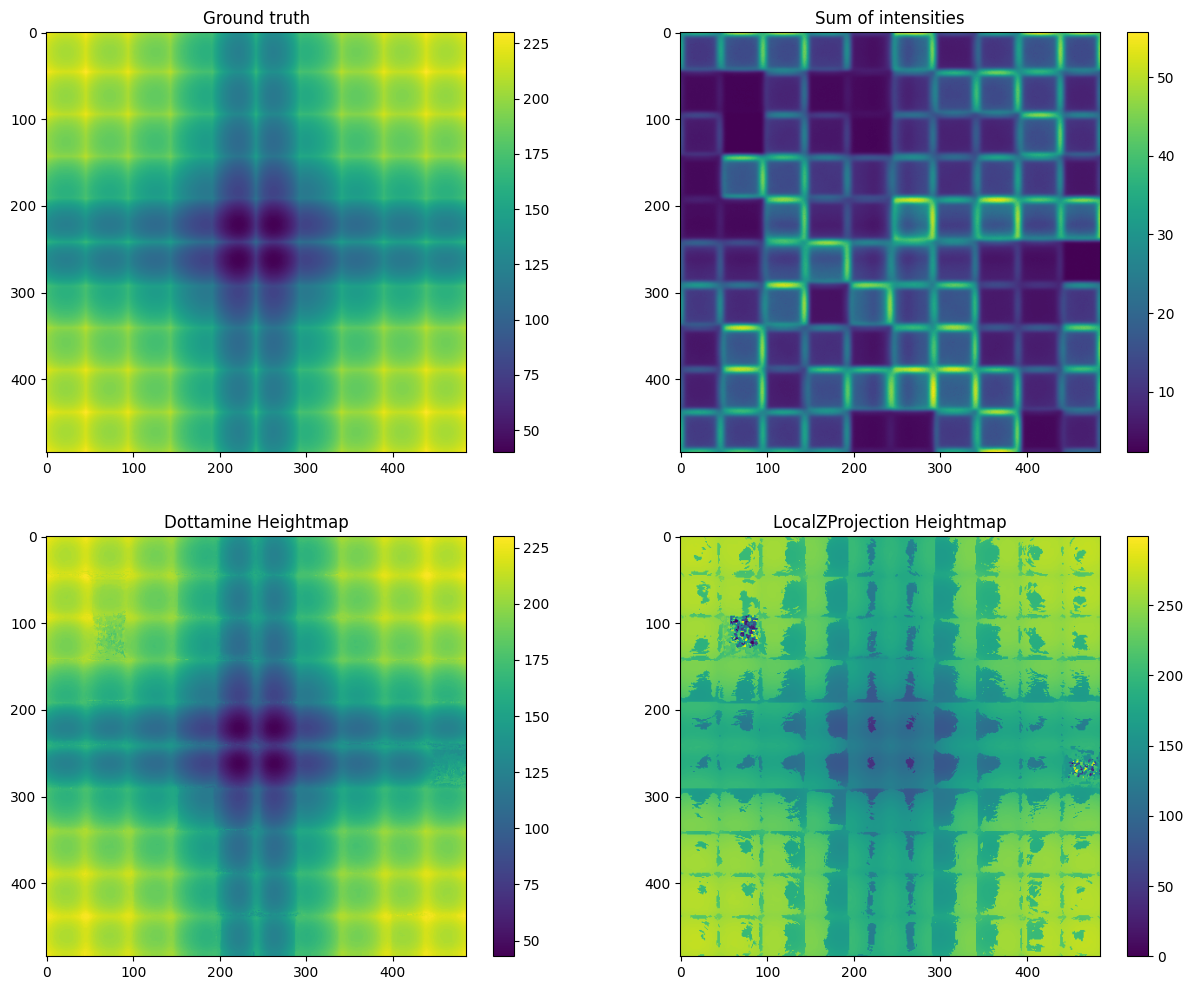

In [69]:
tp = str(4)

realImage = sk.io.imread('./../ppujol/dottamine_benchmark/clear_dome_tp'+tp+'.tif')
realImageIntensities = sk.io.imread('./../ppujol/dottamine_benchmark/modified_dome_tp'+tp+'.tif')
dottamineHeight = sk.io.imread('./../ppujol/dottamine_benchmark/modified_dome_tp'+tp+'cells_mask_filter.tif')
localZ_height = sk.io.imread('./../ppujol/dottamine_benchmark/Reference surface of modified_dome_tp'+tp+'_denoised.tif')


#### real Heightmap
realImage_height = np.argmax(realImage, axis=0)

#### dottamine heightmap
dottamine_height = np.argmax(dottamineHeight, axis=0)
dottamine_height[:4, :] = dottamine_height[5, :]
dottamine_height[-4:, :] = dottamine_height[-5, :]




print(realImage_height.shape)
print(dottamine_height.shape)
print(localZ_height.shape)



plt.figure(figsize=(15,12))
plt.subplot(221)
plt.title('Ground truth')
plt.imshow(realImage_height)
plt.colorbar()
plt.subplot(222)
plt.title('Sum of intensities')
plt.imshow(np.sum(realImageIntensities, axis=0)/realImageIntensities.max())
plt.colorbar()
plt.subplot(223)
plt.title('Dottamine Heightmap')
plt.imshow(dottamine_height)
plt.colorbar()
plt.subplot(224)
plt.title('LocalZProjection Heightmap')
plt.imshow(localZ_height)
plt.colorbar()
plt.savefig("./../ppujol/dottamine_benchmark/heightmaps"+tp+".png", dpi=600)


In order to better compare the LocalZ and Dottamine let's create some plain heightmaps at different heights to check how would they perform.

In [70]:
height0 = np.full(realImage_height.shape, 0)
height_mean = np.full(realImage_height.shape, realImage_height.mean())
height_max = np.full(realImage_height.shape, 299)

Check the comparison values

In [71]:
def calculate_goodness_of_fit(real, exp):
    """
    Calculate the goodness of fit between two arrays.
    
    Parameters:
    - array1: The real array to compare.
    - array2: The exp array to compare.
    
    Returns:
    - The goodness of fit value.
    """
    return np.sum((exp - real)**2 / real)

def calculate_RMSE(real, exp):
    """
    Calculate the RMSE  between two arrays.
    
    Parameters:
    - array1: The real array to compare.
    - array2: The exp array to compare.
    
    Returns:
    - The RMSE.
    """
    return np.sqrt(np.sum((exp-real)**2)/(real.shape[0]*real.shape[1]))

def calculate_RMSE2(real, exp):
    """
    Calculate the RMSE  between two arrays.
    
    Parameters:
    - array1: The real array to compare.
    - array2: The exp array to compare.
    
    Returns:
    - The RMSE.
    """
    return np.sqrt(np.sum((exp-real)**2))/(real.shape[0]*real.shape[1])


In [72]:
print(f"GOODNESS OF FIT -> Dottamine: {calculate_goodness_of_fit(realImage_height, dottamine_height):.2e}, LocalZ: {calculate_goodness_of_fit(realImage_height, localZ_height):.2e}, fold: {calculate_goodness_of_fit(realImage_height, localZ_height)/calculate_goodness_of_fit(realImage_height, dottamine_height)}, Height 0: {calculate_goodness_of_fit(realImage_height, height0):.2e} , Height Mean: {calculate_goodness_of_fit(realImage_height, height_mean):.2e} , Height Max: {calculate_goodness_of_fit(realImage_height, height_max):.2e}")
print(f"RMSE -> Dottamine: {calculate_RMSE(realImage_height, dottamine_height):.2e}, LocalZ: {calculate_RMSE(realImage_height, localZ_height):.2e}, fold: {calculate_RMSE(realImage_height, localZ_height)/calculate_RMSE(realImage_height, dottamine_height)}, Height 0: {calculate_RMSE(realImage_height, height0):.2e} , Height Mean: {calculate_RMSE(realImage_height, height_mean):.2e} , Height Max: {calculate_RMSE(realImage_height, height_max):.2e}")
print(f"RMSE2 -> Dottamine: {calculate_RMSE2(realImage_height, dottamine_height):.2e}, LocalZ: {calculate_RMSE2(realImage_height, localZ_height):.2e}, fold: {calculate_RMSE2(realImage_height, localZ_height)/calculate_RMSE2(realImage_height, dottamine_height)}, Height 0: {calculate_RMSE2(realImage_height, height0):.2e} , Height Mean: {calculate_RMSE2(realImage_height, height_mean):.2e} , Height Max: {calculate_RMSE2(realImage_height, height_max):.2e}")

GOODNESS OF FIT -> Dottamine: 3.77e+04, LocalZ: 3.70e+06, fold: 98.1565632720264, Height 0: 3.73e+07 , Height Mean: 3.76e+06 , Height Max: 4.24e+07
RMSE -> Dottamine: 4.54e+00, LocalZ: 4.69e+01, fold: 10.313627642483842, Height 0: 1.64e+02 , Height Mean: 4.06e+01 , Height Max: 1.46e+02
RMSE2 -> Dottamine: 9.37e-03, LocalZ: 9.66e-02, fold: 10.313627642483844, Height 0: 3.38e-01 , Height Mean: 8.36e-02 , Height Max: 3.01e-01


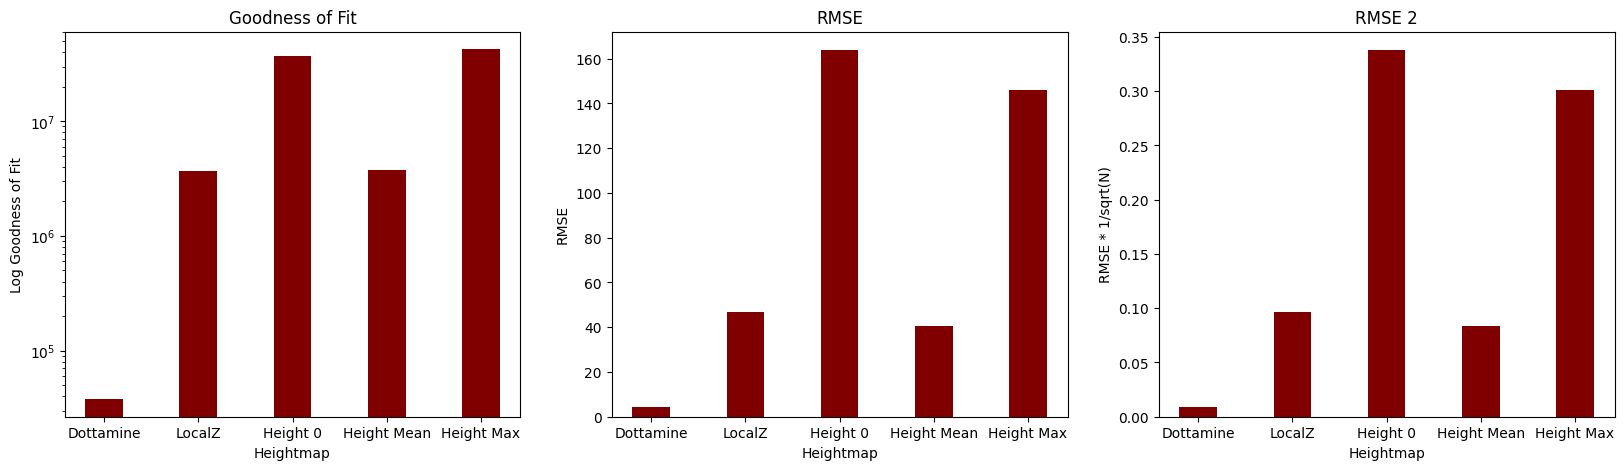

In [73]:
goodness_dict = {'Dottamine' :calculate_goodness_of_fit(realImage_height, dottamine_height),
                 'LocalZ' :calculate_goodness_of_fit(realImage_height, localZ_height),
                 'Height 0': calculate_goodness_of_fit(realImage_height, height0),
                 'Height Mean': calculate_goodness_of_fit(realImage_height, height_mean),
                 'Height Max': calculate_goodness_of_fit(realImage_height, height_max)}

rmse_dict = {'Dottamine' :calculate_RMSE(realImage_height, dottamine_height),
                 'LocalZ' :calculate_RMSE(realImage_height, localZ_height),
                 'Height 0': calculate_RMSE(realImage_height, height0),
                 'Height Mean': calculate_RMSE(realImage_height, height_mean),
                 'Height Max': calculate_RMSE(realImage_height, height_max)}

rmse2_dict = {'Dottamine' :calculate_RMSE2(realImage_height, dottamine_height),
                 'LocalZ' :calculate_RMSE2(realImage_height, localZ_height),
                 'Height 0': calculate_RMSE2(realImage_height, height0),
                 'Height Mean': calculate_RMSE2(realImage_height, height_mean),
                 'Height Max': calculate_RMSE2(realImage_height, height_max)}

plt.figure(figsize = (20, 5))

plt.subplot(131)
arrays = list(goodness_dict.keys())
values = list(goodness_dict.values())
plt.bar(arrays, values, color ='maroon', width = 0.4)
plt.xlabel("Heightmap")
plt.ylabel("Log Goodness of Fit")
plt.yscale("log")
plt.title("Goodness of Fit")

plt.subplot(132)
arrays = list(rmse_dict.keys())
values = list(rmse_dict.values())
plt.bar(arrays, values, color ='maroon', width = 0.4)
plt.xlabel("Heightmap")
plt.ylabel("RMSE")
# plt.yscale("log")
plt.title("RMSE")

plt.subplot(133)
arrays = list(rmse2_dict.keys())
values = list(rmse2_dict.values())
plt.bar(arrays, values, color ='maroon', width = 0.4)
plt.xlabel("Heightmap")
plt.ylabel("RMSE * 1/sqrt(N)")
# plt.yscale("log")
plt.title("RMSE 2")

plt.savefig("./../ppujol/dottamine_benchmark/comparisons"+tp+".png", dpi=600)


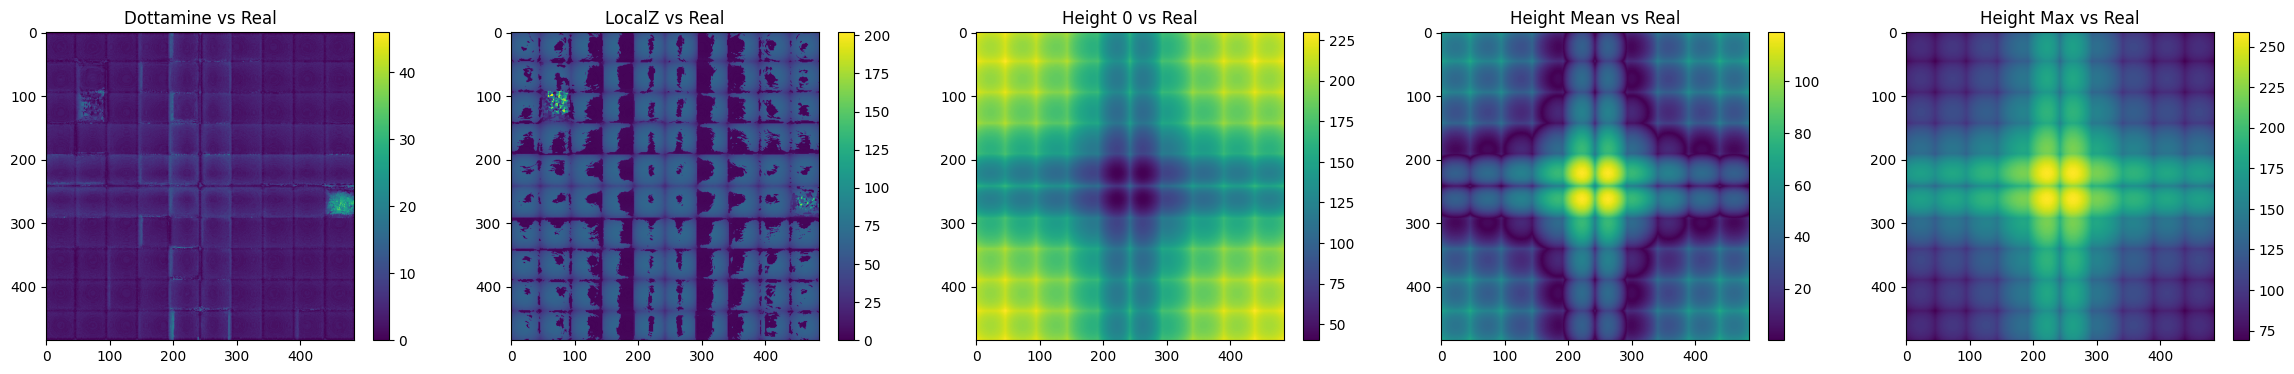

In [74]:
plt.figure(figsize=(29,4))
plt.subplot(151)
plt.title('Dottamine vs Real')
plt.imshow(abs(dottamine_height-realImage_height), cmap='viridis')
plt.colorbar()
plt.subplot(152)
plt.title('LocalZ vs Real')
plt.imshow(abs(localZ_height-realImage_height), cmap='viridis')
plt.colorbar()
plt.subplot(153)
plt.title('Height 0 vs Real')
plt.imshow(abs(height0-realImage_height), cmap='viridis')
plt.colorbar()
plt.subplot(154)
plt.title('Height Mean vs Real')
plt.imshow(abs(height_mean-realImage_height), cmap='viridis')
plt.colorbar()
plt.subplot(155)
plt.title('Height Max vs Real')
plt.imshow(abs(height_max-realImage_height), cmap='viridis')
plt.colorbar()

plt.savefig("./../ppujol/dottamine_benchmark/comparisons_differences"+tp+".png", dpi=600)

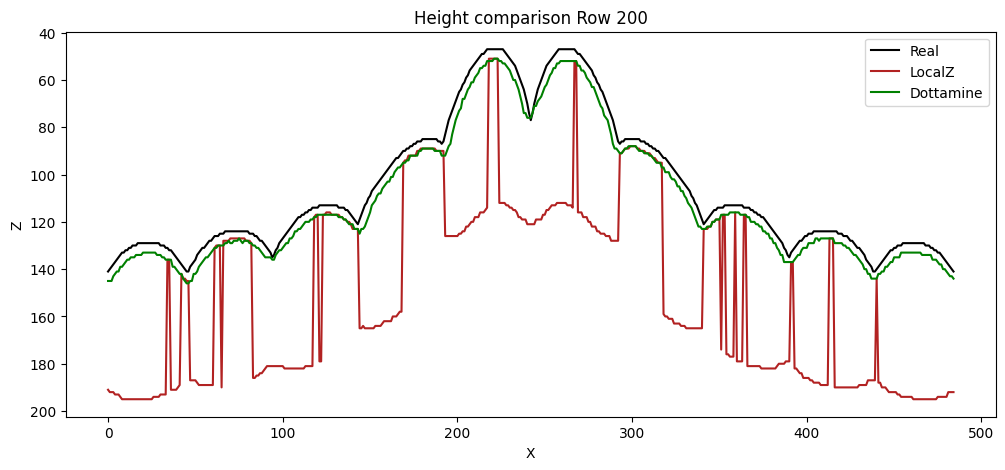

In [75]:
row = 210

plt.figure(figsize=(12,5))
# plt.subplot(231)
# plt.title('Original Height')
# plt.plot(realImage_height[row])
# # plt.colorbar()
# plt.subplot(232)
# plt.title('Dottamine Heightmap')
# plt.plot(dottamine_height[row])
# # plt.colorbar()
# plt.subplot(233)
# plt.title('LocalZProjection Heightmap')
# plt.plot(localZ_height[row])
# # plt.ylim(265, 275)
# # plt.colorbar()


plt.title('Height comparison Row 200')
plt.plot(realImage_height[row], 'black', label='Real')
plt.plot(localZ_height[row], 'firebrick', label='LocalZ')
plt.plot(dottamine_height[row], 'green', label='Dottamine')
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel("X")
plt.ylabel("Z")



plt.savefig("./../ppujol/dottamine_benchmark/Line_200"+tp+".png", dpi=600)

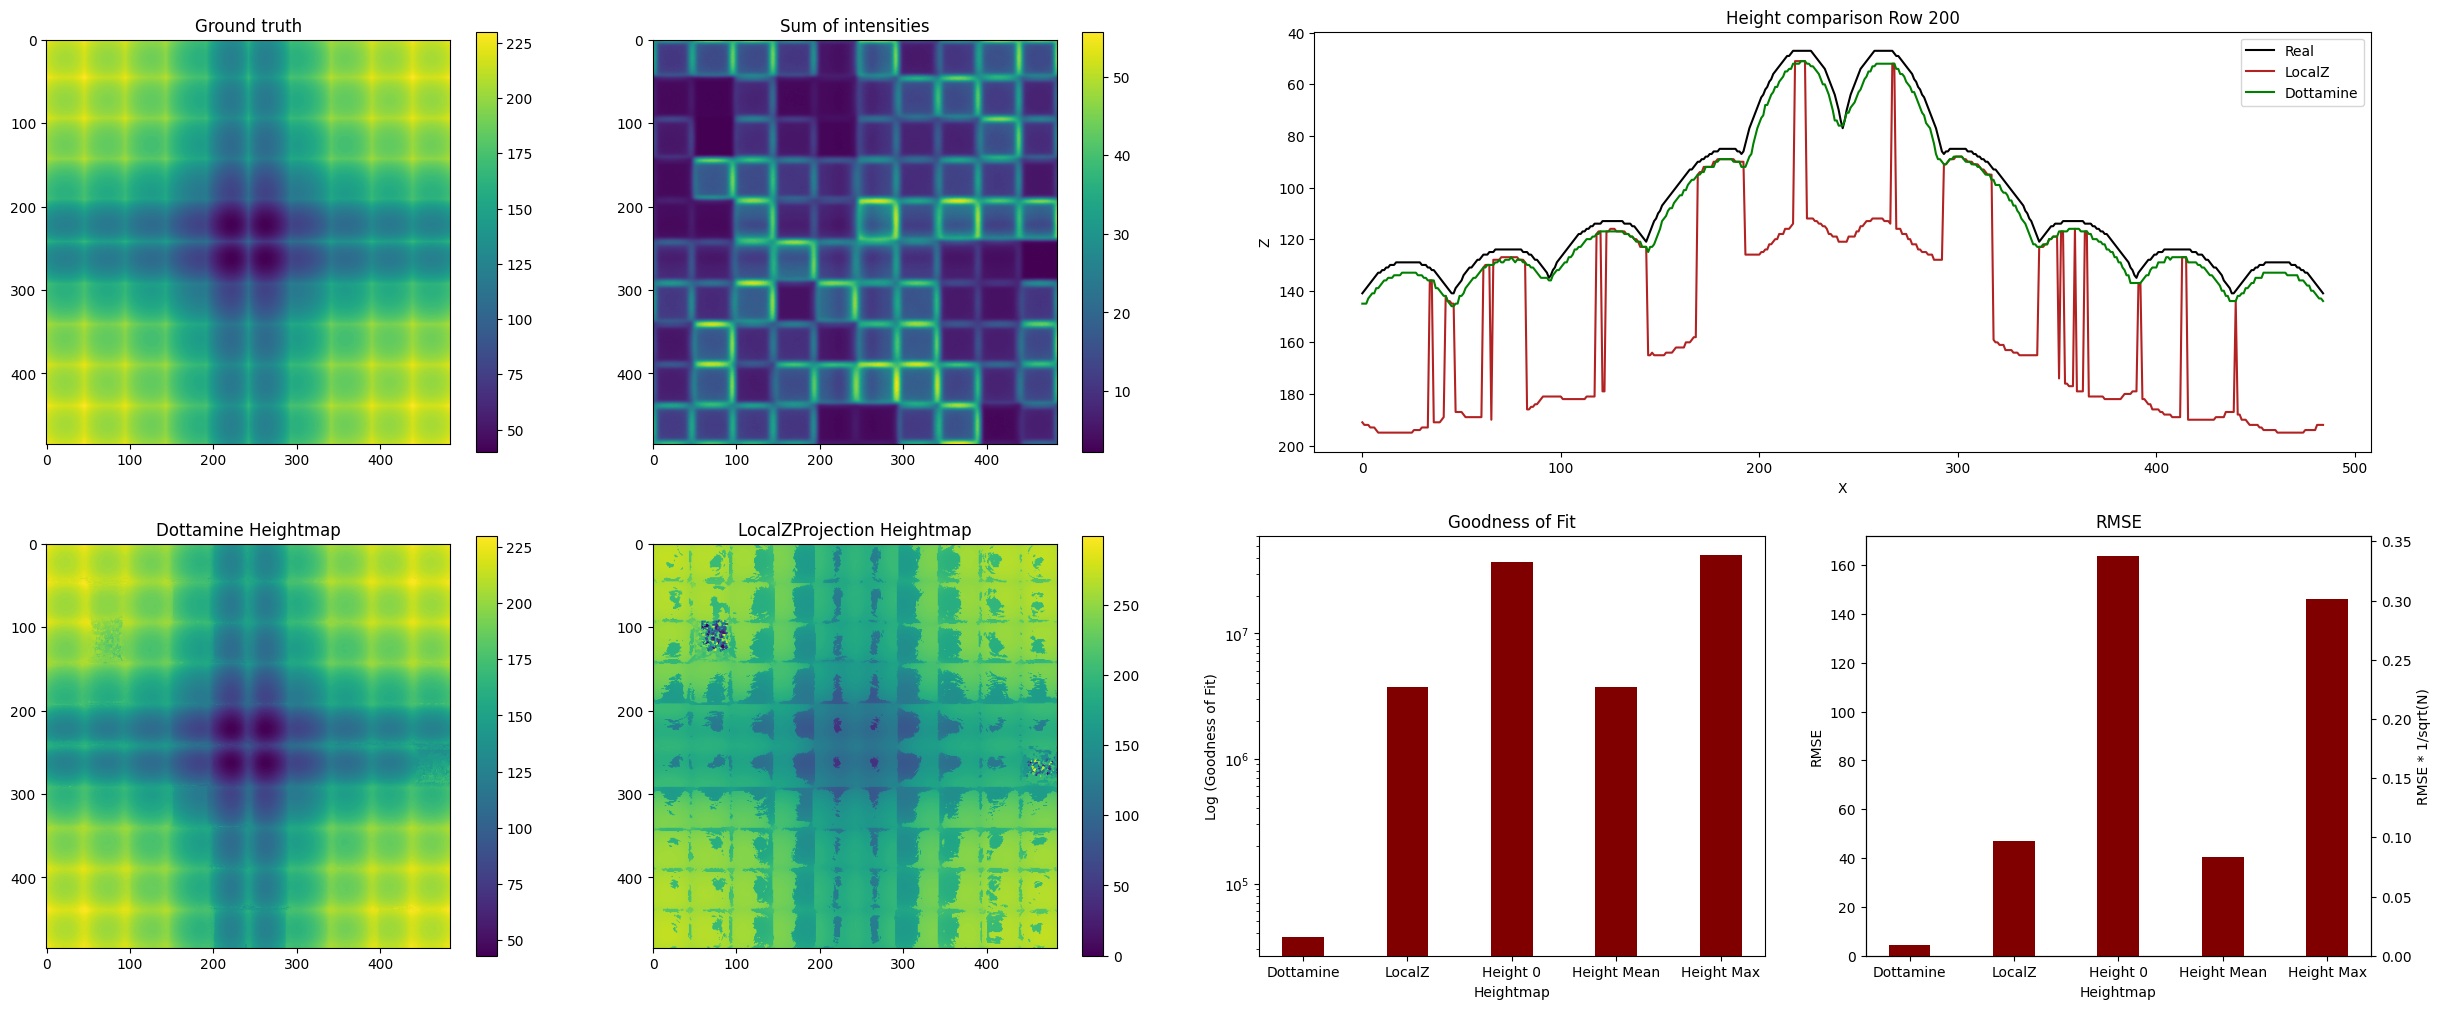

In [76]:
## General plot






plt.figure(figsize=(30,12))
plt.subplot(241)
plt.title('Ground truth')
plt.imshow(realImage_height)
plt.colorbar()
plt.subplot(242)
plt.title('Sum of intensities')
plt.imshow(np.sum(realImageIntensities, axis=0)/realImageIntensities.max())
plt.colorbar()
plt.subplot(245)
plt.title('Dottamine Heightmap')
plt.imshow(dottamine_height)
plt.colorbar()
plt.subplot(246)
plt.title('LocalZProjection Heightmap')
plt.imshow(localZ_height)
plt.colorbar()




plt.subplot(222)
plt.title('Height comparison Row 200')
plt.plot(realImage_height[row], 'black', label='Real')
plt.plot(localZ_height[row], 'firebrick', label='LocalZ')
plt.plot(dottamine_height[row], 'green', label='Dottamine')
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel("X")
plt.ylabel("Z")





plt.subplot(247)
arrays = list(goodness_dict.keys())
values = list(goodness_dict.values())
plt.bar(arrays, values, color ='maroon', width = 0.4)
plt.xlabel("Heightmap")
plt.ylabel("Log (Goodness of Fit)")
plt.yscale("log")
plt.title("Goodness of Fit")
plt.subplot(248)
aarrays = list(rmse_dict.keys())
values = list(rmse_dict.values())
ax1 = plt.gca()
ax1.bar(arrays, values, color ='maroon', width = 0.4)
ax1.set_xlabel("Heightmap")
ax1.set_ylabel("RMSE")
plt.title("RMSE")

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
arrays2 = list(rmse2_dict.keys())
values2 = list(rmse2_dict.values())
ax2.bar(arrays2, values2, color='maroon', width=0.4, alpha=0.5) # Adjust color and alpha as needed
ax2.set_ylabel("RMSE * 1/sqrt(N)") # Set the label for the second y-axis





plt.savefig("./../ppujol/dottamine_benchmark/total_analysis_tp"+tp+".png", dpi=600)
